In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the processed data
df = pd.read_csv("processed_data.csv")

# Display first 5 rows
df.head()


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,1,115,85,0,0
1,0,0,1,0,0,0,0,0,1,1,115,85,0,0
2,1,1,1,0,0,0,0,0,1,1,115,85,0,0
3,0,1,1,0,0,0,0,0,1,1,115,85,0,0
4,1,2,1,0,0,0,0,0,1,1,115,85,0,0


In [2]:
# Basic info
print("\n📌 Dataset Info:")
df.info()

# Descriptive statistics
print("\n📌 Descriptive Statistics:")
print(df.describe())

# Check for missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())



📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1825 non-null   int64
 1   Age              1825 non-null   int64
 2   History          1825 non-null   int64
 3   Patient          1825 non-null   int64
 4   TakeMedication   1825 non-null   int64
 5   Severity         1825 non-null   int64
 6   BreathShortness  1825 non-null   int64
 7   VisualChanges    1825 non-null   int64
 8   NoseBleeding     1825 non-null   int64
 9   Whendiagnoused   1825 non-null   int64
 10  Systolic         1825 non-null   int64
 11  Diastolic        1825 non-null   int64
 12  ControlledDiet   1825 non-null   int64
 13  Stages           1825 non-null   int64
dtypes: int64(14)
memory usage: 199.7 KB

📌 Descriptive Statistics:
            Gender          Age      History      Patient  TakeMedication  \
count  1825.000000  1825.00

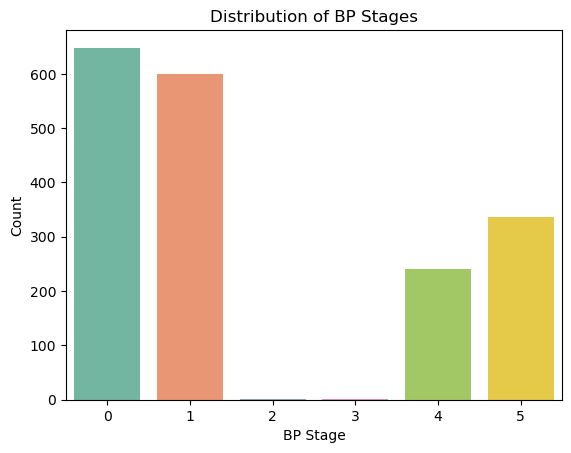

In [4]:
# Corrected: Plotting distribution of BP Stages
sns.countplot(data=df, x='Stages', palette='Set2')
plt.title("Distribution of BP Stages")
plt.xlabel("BP Stage")
plt.ylabel("Count")
plt.show()


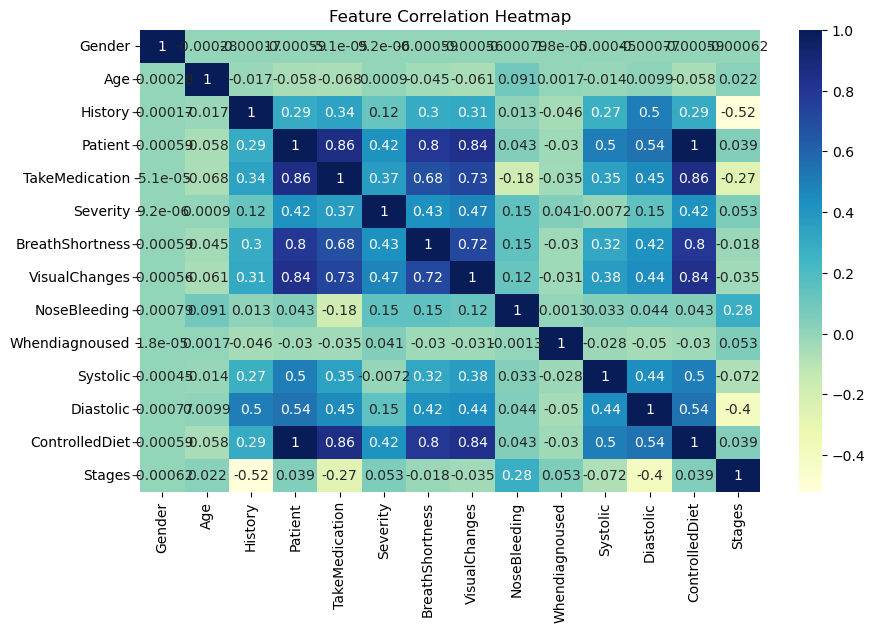

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()


--- Descriptive Statistics ---
             C    Age History Patient TakeMedication  Severity  \
count     1825   1825    1825    1825           1825      1825   
unique       2      4       2       2              3         3   
top     Female  51-64     Yes      No             No  Moderate   
freq       913    475    1657     984            744       697   
mean       NaN    NaN     NaN     NaN            NaN       NaN   
std        NaN    NaN     NaN     NaN            NaN       NaN   
min        NaN    NaN     NaN     NaN            NaN       NaN   
25%        NaN    NaN     NaN     NaN            NaN       NaN   
50%        NaN    NaN     NaN     NaN            NaN       NaN   
75%        NaN    NaN     NaN     NaN            NaN       NaN   
max        NaN    NaN     NaN     NaN            NaN       NaN   

       BreathShortness VisualChanges NoseBleeding Whendiagnoused     Systolic  \
count             1825          1825         1825           1825  1825.000000   
unique       

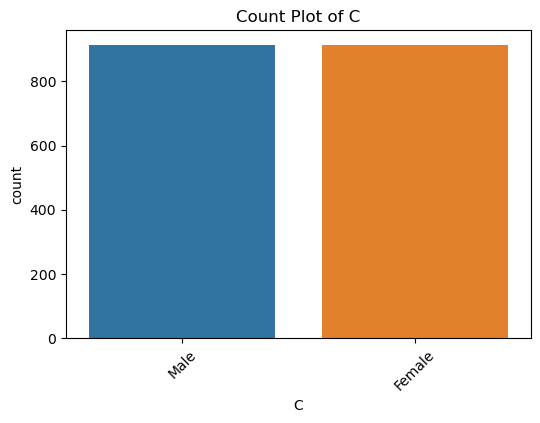

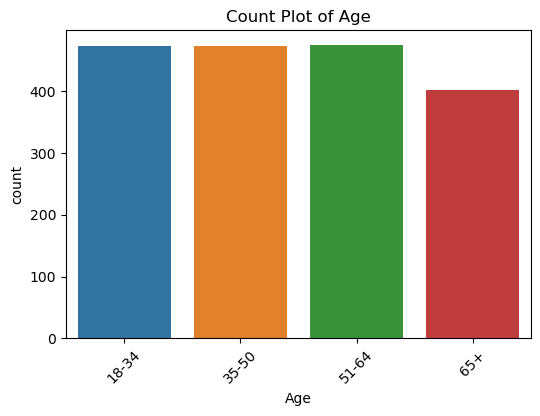

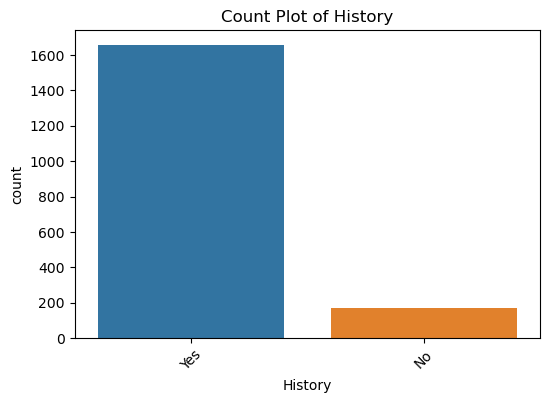

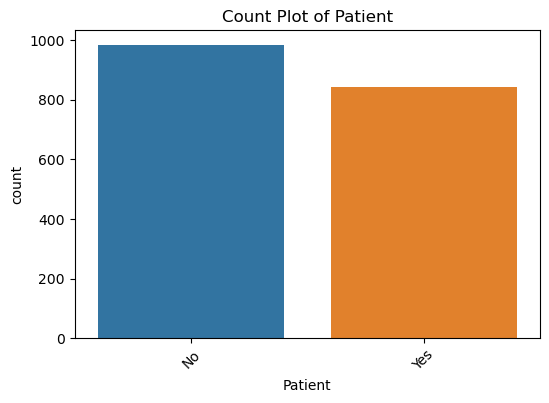

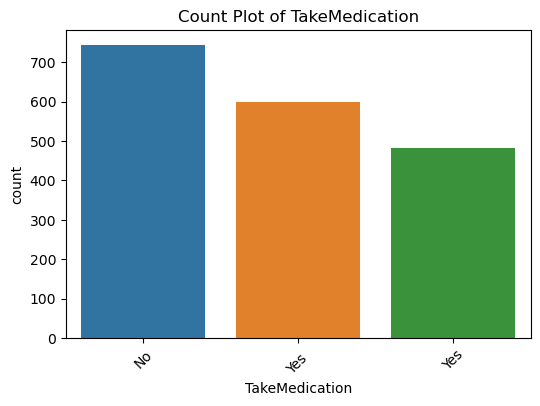

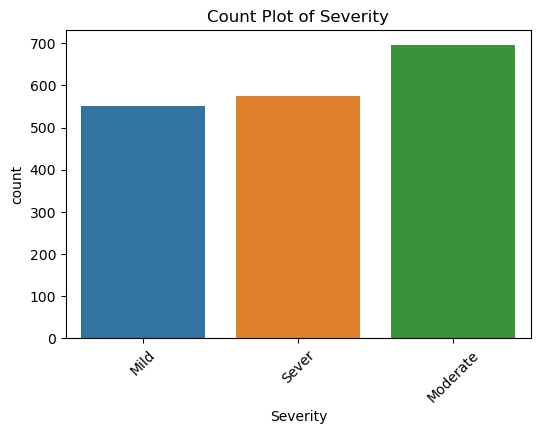

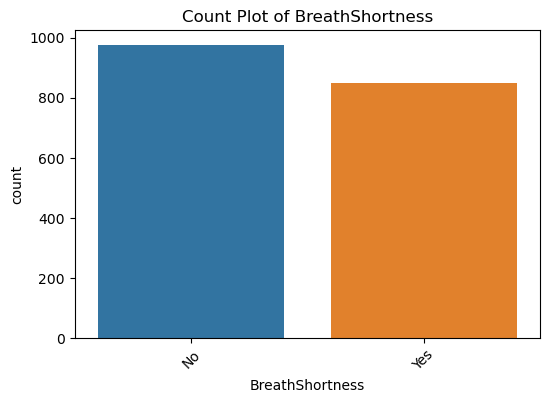

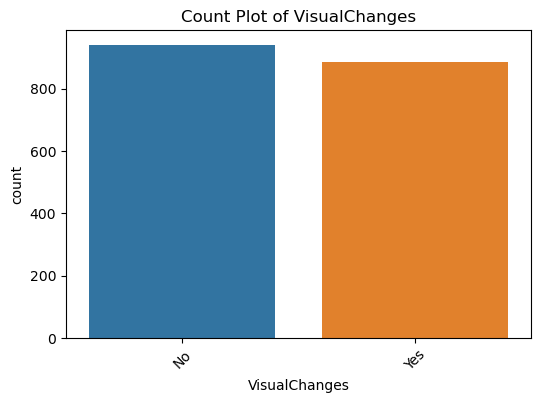

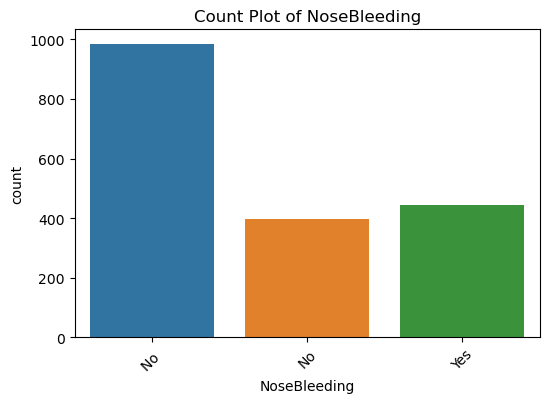

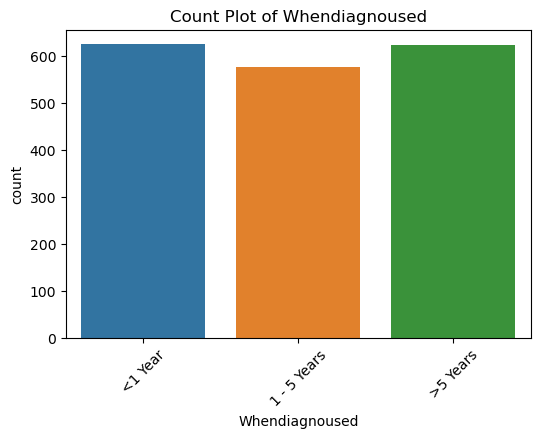

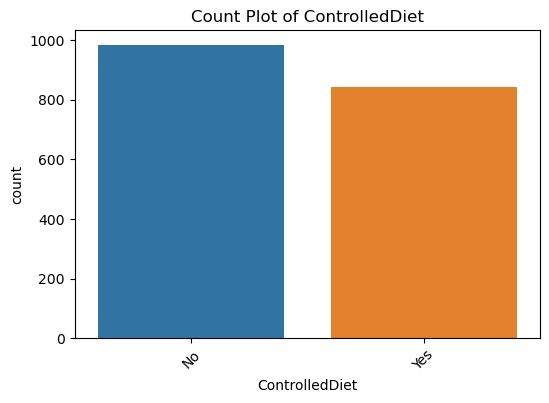

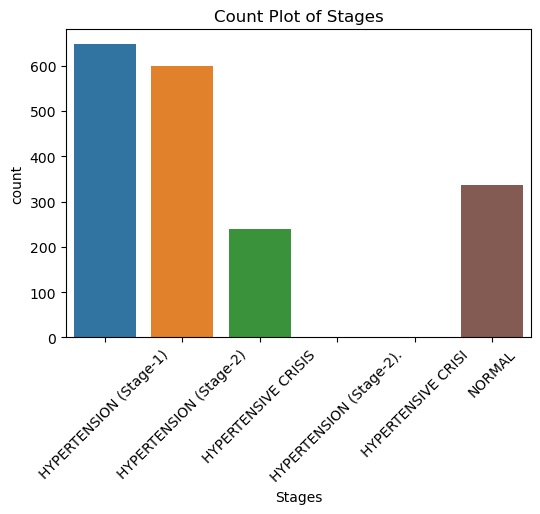

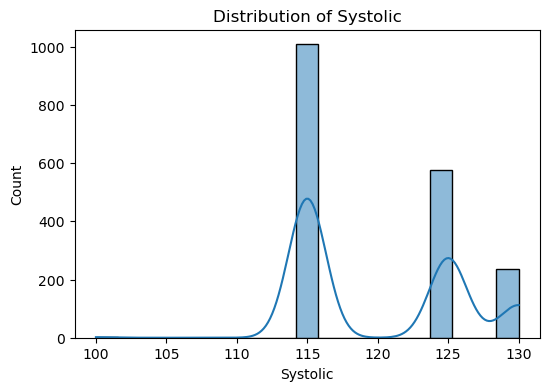

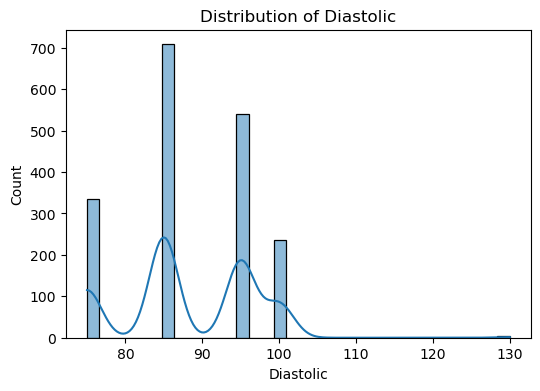

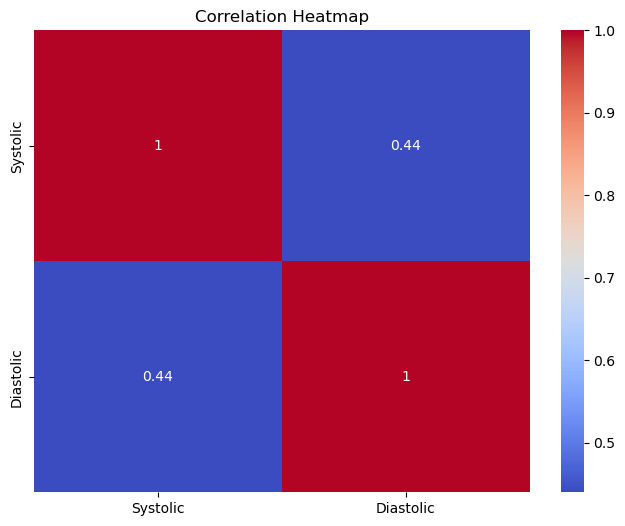

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("patient_data.csv")

# ===== Convert BP Ranges to Numeric =====
def extract_avg(value):
    value = str(value).strip().replace(" ", "")
    if "-" in value:
        nums = [int(s) for s in value.split("-")]
        return sum(nums) // len(nums)
    elif "+" in value:
        return int(value.replace("+", ""))
    else:
        return int(value)

df["Systolic"] = df["Systolic"].apply(extract_avg)
df["Diastolic"] = df["Diastolic"].apply(extract_avg)

# ===== Activity 1: Descriptive Statistical =====
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

# ===== Activity 2.1: Univariate Analysis =====
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# ===== Activity 2.2: Bivariate Analysis =====
if "Gender" in df.columns and "Stages" in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x="Gender", y="Systolic")  # Example: Gender vs Systolic BP
    plt.title("Gender vs Systolic BP")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ===== Activity 2.3: Multivariate Analysis (Encoding) =====
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# ===== Splitting Data =====
X = df.drop("Stages", axis=1)  # Correct target column
y = df["Stages"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Scaling =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== Handling Class Imbalance =====
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())


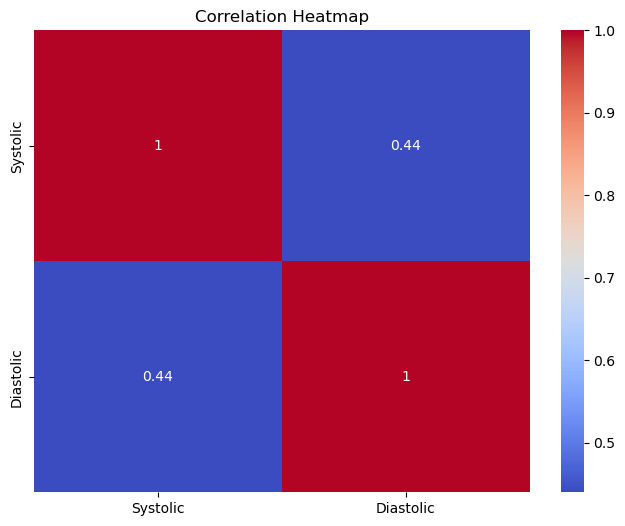

In [5]:
# ===== Activity 2.2: Bivariate Analysis =====
if "Gender" in df.columns and "Stages" in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x="Gender", y="Systolic")  # Example: Gender vs Systolic BP
    plt.title("Gender vs Systolic BP")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
